<a href="https://colab.research.google.com/github/RayedShamim/Regression-Capstone-Seoul-Bike-Sharing-Capstone-Project/blob/main/Capstone_Bike_Sharing_Demand_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Seoul Bike Sharing Demand Prediction**
### by Rayed Shamim



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

...

# **GitHub Link -**

https://github.com/RayedShamim/Regression-Capstone-Seoul-Bike-Sharing-Capstone-Project

# **Problem Statement**


Seoul, the capital of South Korea, is one of the largest cities in the world with over 10 million people living in it. And transportation in such large cities often becomes an issue from time to time. Rental Bikes offer a solution to this problem. This helps the people in less waiting time, high mobility and a comfortable ride.

Now with growing population in urban cities, it become a challenging task to provide a stable supply of retal bikes at peak hours. A lot of variable are taken into account when dealing with the bike demand such as hour, weather conditions, and if it is a holiday. Certain hours have more demand.

So using the data provided we are going to analysis and predict the bike sharing demand every hour, using certain mathematical algorithms. We will see how certain condition such as season and weather affect the demand of the bike.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [229]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Dataset Loading

In [230]:
# Load Dataset

path = 'https://raw.githubusercontent.com/RayedShamim/Regression-Capstone-Seoul-Bike-Sharing-Capstone-Project/main/SeoulBikeData.csv'

df = pd.read_csv('https://raw.githubusercontent.com/RayedShamim/Regression-Capstone-Seoul-Bike-Sharing-Capstone-Project/main/SeoulBikeData.csv',encoding = 'unicode_escape')

### Dataset First View

In [231]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [232]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [233]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [234]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [235]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

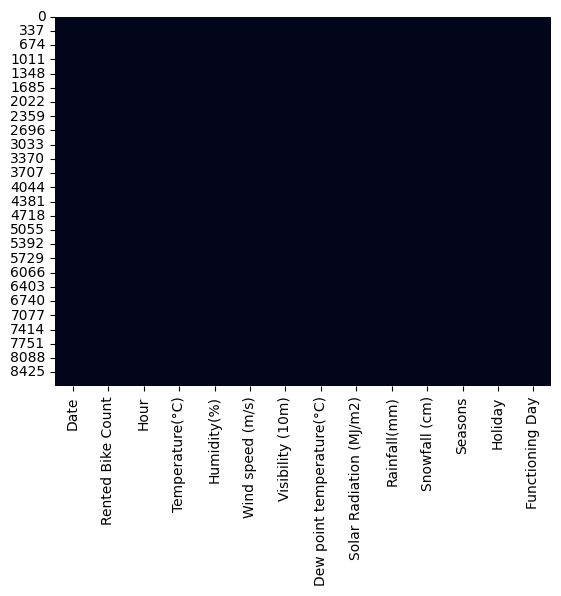

In [236]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar= False)

### What did you know about your dataset?

The Shape of the data is 8760, 14. There are no null values present in any of the column and also there are no duplicate values.

The data is given on per hour basis(row) in which it mentions the date, the number of bikes rented, the temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, snowfall, the season, weather it is a holiday, and whether the bike rental service is fuctioning or not.

## ***2. Understanding Your Variables***

In [237]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [238]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

## **Seoul Bike Data**

* **Date:** Date of the day
* **Rented Bike Count:** Number of bikes rented in that hour
* **Hour:** Hour of that day
* **Temperature(°C):** Temperature in that hour of the day
* **Humidity(%):** Humidity in that hour of the day
* **Wind Speed(m/s):** Wind speed in that hour of the day
* **Visibility(10m):** Visibility in 10 meters
* **Dew Point Temperature(°C):** The temperature at which the condensation starts to occur
* **Solar Radiation(MJ/m2):** Amount of radiation from sun in Mega Joules per meter square
* **RainFall(mm):** Rainfall in that hour of the day in millimeters
* **Snowfall(cm):** Snowfall in that hour in centimeters
* **Seasons:** Season of that day
* **Holiday:** Whether that day is a holiday
* **Functioning Day:** Whether the rental bike service functioning on that day

### Check Unique Values for each variable.

In [239]:
# Check Unique Values for each variable.
for col in df:
  print()
  print(f'The column {col} has {df[col].nunique()} unique values')


The column Date has 365 unique values

The column Rented Bike Count has 2166 unique values

The column Hour has 24 unique values

The column Temperature(°C) has 546 unique values

The column Humidity(%) has 90 unique values

The column Wind speed (m/s) has 65 unique values

The column Visibility (10m) has 1789 unique values

The column Dew point temperature(°C) has 556 unique values

The column Solar Radiation (MJ/m2) has 345 unique values

The column Rainfall(mm) has 61 unique values

The column Snowfall (cm) has 51 unique values

The column Seasons has 4 unique values

The column Holiday has 2 unique values

The column Functioning Day has 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [240]:
# Write your code to make your dataset analysis ready.
# peak hour average count in the entire year
df.groupby('Hour').agg({'Rented Bike Count':'mean'}).sort_values(by='Rented Bike Count',ascending=False)

,Rented Bike Count
Hour,
18,1502.926027
19,1195.147945
17,1138.509589
20,1068.964384
21,1031.449315
8,1015.701370
16,930.621918
22,922.797260
15,829.186301


In [241]:
# peak hour average Rented Bike count season wise
avg_season_wise = df.groupby(['Hour','Seasons']).agg({'Rented Bike Count':'mean'}).sort_values(by='Rented Bike Count',ascending=False).unstack()
avg_season_wise

Rented Bike Count                                      
Seasons            Autumn       Spring       Summer      Winter
Hour                                                           
0              623.681319   470.630435   899.065217  165.177778
1              485.714286   356.032609   698.771739  159.055556
2              331.846154   247.467391   505.750000  117.788889
3              225.538462   164.815217   342.673913   77.811111
4              148.593407   105.869565   223.815217   50.477778
5              143.659341   113.652174   245.934783   51.222222
6              316.032967   251.641304   485.836957   92.822222
7              702.186813   601.913043   902.782609  209.566667
8             1197.230769  1013.847826  1418.597826  422.200000
9              755.197802   655.815217   911.000000  254.600000
10             636.670330   558.478261   723.500000  186.400000
11             714.714286   666.652174   786.858696  228.322222
12             831.934066   818.195652   875.967391  263.633333
13             892.483516   866.826087   890.195652  275.255556
14             942.472527   905.543478   894.673913  284.288889
15            1029.593407   969.434783  1009.717391  298.644444
16            1151.098901  1077.510870  1174.173913  308.577778
17            1391.131868  1279.543478  1526.293478  342.511111
18            1765.384615  1652.586957  2135.141304  438.300000
19            1349.021978  1220.586957  1889.250000  304.033333
20            1176.461538  1037.456522  1801.923913  243.233333
21            1116.032967   998.923913  1754.065217  240.500000
22            1006.010989   877.913043  1567.869565  225.133333
23             737.659341   609.413043  1153.902174  173.433333

In [242]:
# average temperature values season wise
avg_temp_season = df.groupby(['Hour','Seasons']).agg({'Temperature(°C)':'mean'}).sort_values(by='Seasons',ascending=False).unstack()
print(avg_temp_season)

        Temperature(°C)                                
Seasons          Autumn     Spring     Summer    Winter
Hour                                                   
0             12.629670  11.064130  24.752174 -3.610000
1             12.212088  10.678261  24.385870 -3.891111
2             11.808791  10.326087  24.097826 -4.174444
3             11.418681  10.011957  23.801087 -4.363333
4             11.118681   9.725000  23.520652 -4.564444
5             10.831868   9.478261  23.263043 -4.803333
6             10.565934   9.285870  23.115217 -5.031111
7             10.412088   9.406522  23.441304 -5.248889
8             10.831868  10.336957  24.535870 -5.326667
9             12.351648  11.785870  25.827174 -4.802222
10            14.237363  13.318478  27.060870 -3.314444
11            15.862637  14.764130  28.122826 -1.843333
12            17.045055  15.932609  29.106522 -0.566667
13            17.861538  16.829348  29.783696  0.216667
14            18.440659  17.391304  30.234783  0

In [243]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [244]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [245]:
# Checking if bikes were rented when its not a functioning day
print(df[df['Functioning Day'] == 'No'].groupby('Seasons').agg({'Rented Bike Count':'sum'}))

print('\n Since there are no bikes rented on NO fucntioning day, it is impossible to predict the bike demand. \nHence we are going to remove the rows that have NO functioning and also the fucntioning column after that.')

         Rented Bike Count
Seasons                   
Autumn                   0
Spring                   0

 Since there are no bikes rented on NO fucntioning day, it is impossible to predict the bike demand. 
Hence we are going to remove the rows that have NO functioning and also the fucntioning column after that.


In [246]:
warnings.filterwarnings('ignore')
mod_df = df[df['Functioning Day'] == 'Yes']

print(f'\n{df.shape[0] - mod_df.shape[0]} rows with NO functioning were removed.')



295 rows with NO functioning were removed.


In [247]:
mod_df['Date'] = mod_df['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

### What all manipulations have you done and insights you found?

From my analysis, the demand for rented bikes in the city of Seoul is the highest on average on 18th hour of the day. Also their is another local maxima on the 8th hour of the day in which rental bike demand increases. This could be because people in the morning rush to their offices and the bikes offer an easy and convenient solution around the traffic. Or maybe it could be that people live near their offices so they use bikes for their commute.

Also the following created table presents an interesting scenario: -

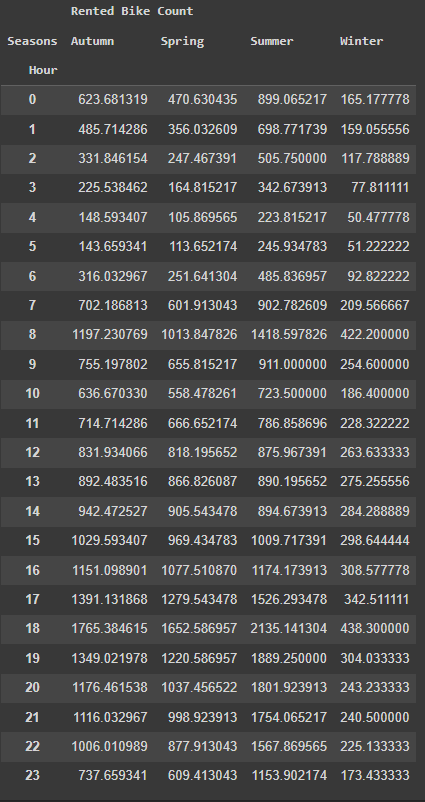

In the table above, we see that their is a higher demand on an average in the Summer season wereas the demand for rental bike reduces significantly in winter season. The other two seansons namely the Autumn and Spring season remains slightly below of summer season demand. This is an indicative that people prefer using rental bike sharing in hotter temperatures.

To further back this statement we will look at another table below: -

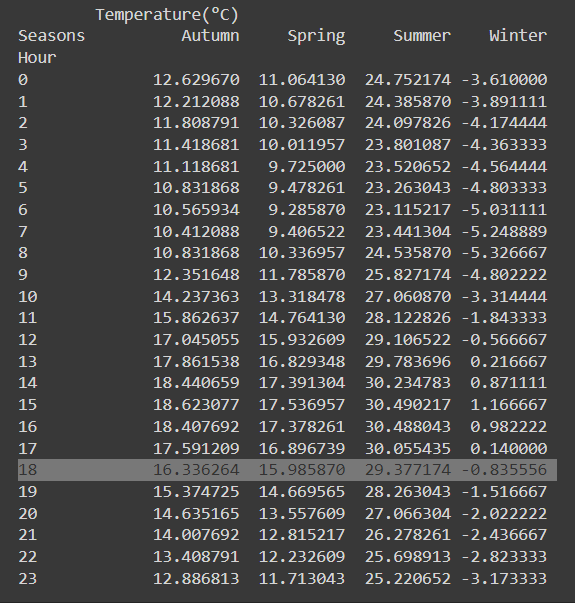

So we see that temperature has almost direct correlation with rental bike demand in Seoul. Since the winter season the temperatures are almost freezing, it could be one of many reasons as to why people dont use rental bike service.

Some other modifications that was done is the removal of rows that had "No" functionning of rental bike service. 295 entries were removed which belonged to Autumn and spring season. 295 entries translates to 295/24 = 12.3 days. So nearly 12.3 days were holidays in the year in which the Bike rental service was not functioning.

There are other factors also present in the data such as humidity, visibility, rainfall etc. which may or may not influence the demand of the service. We will look at how those individual factors affect the bike demand.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Average bike demand, temperature with respect to hour, Season wise (Multi - variate)

<Axes: title={'center': 'Average Rented Bike count Season wise'}, xlabel='Hour', ylabel='Rented Bike Count'>

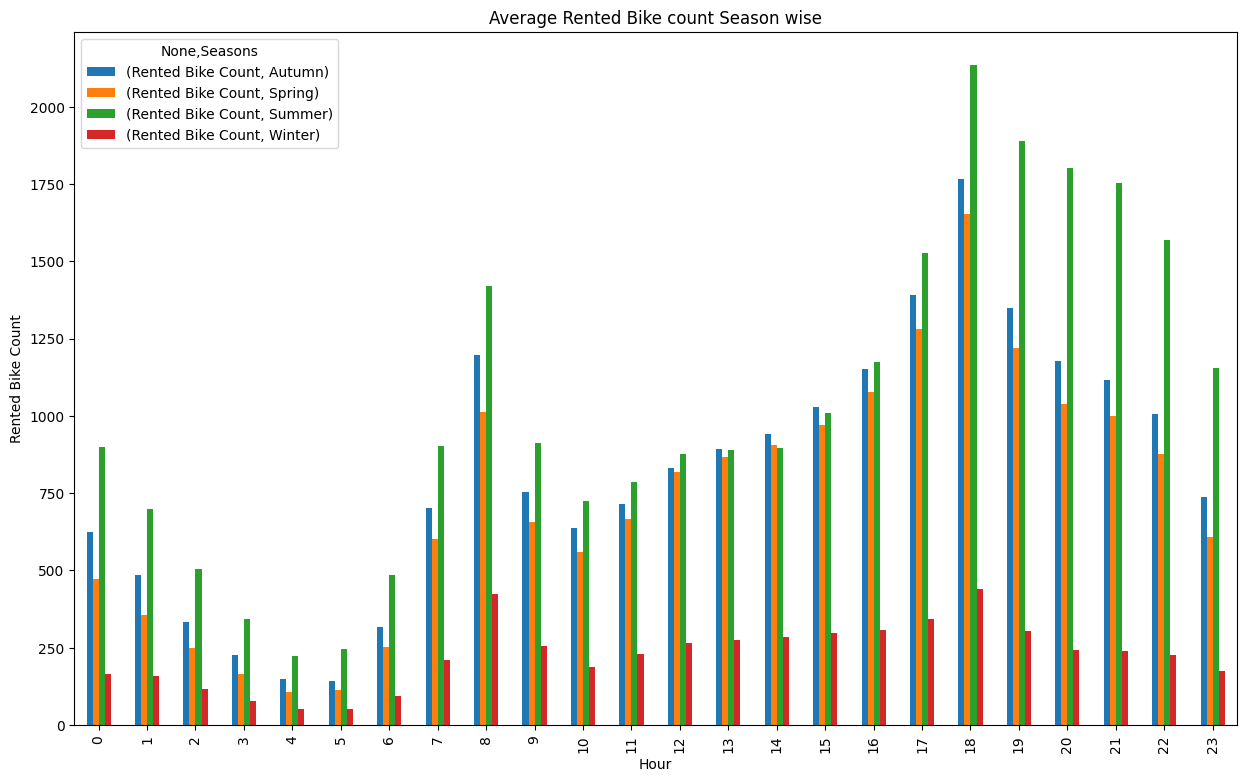

In [248]:
# Chart - 1 visualization code
avg_season_wise.plot(kind='bar',
                     figsize=(15,9),
                     title='Average Rented Bike count Season wise',
                     ylabel='Rented Bike Count')

<Axes: title={'center': 'Average Temperature(C) per hour Season wise'}, xlabel='Hour', ylabel='Temperature(C)'>

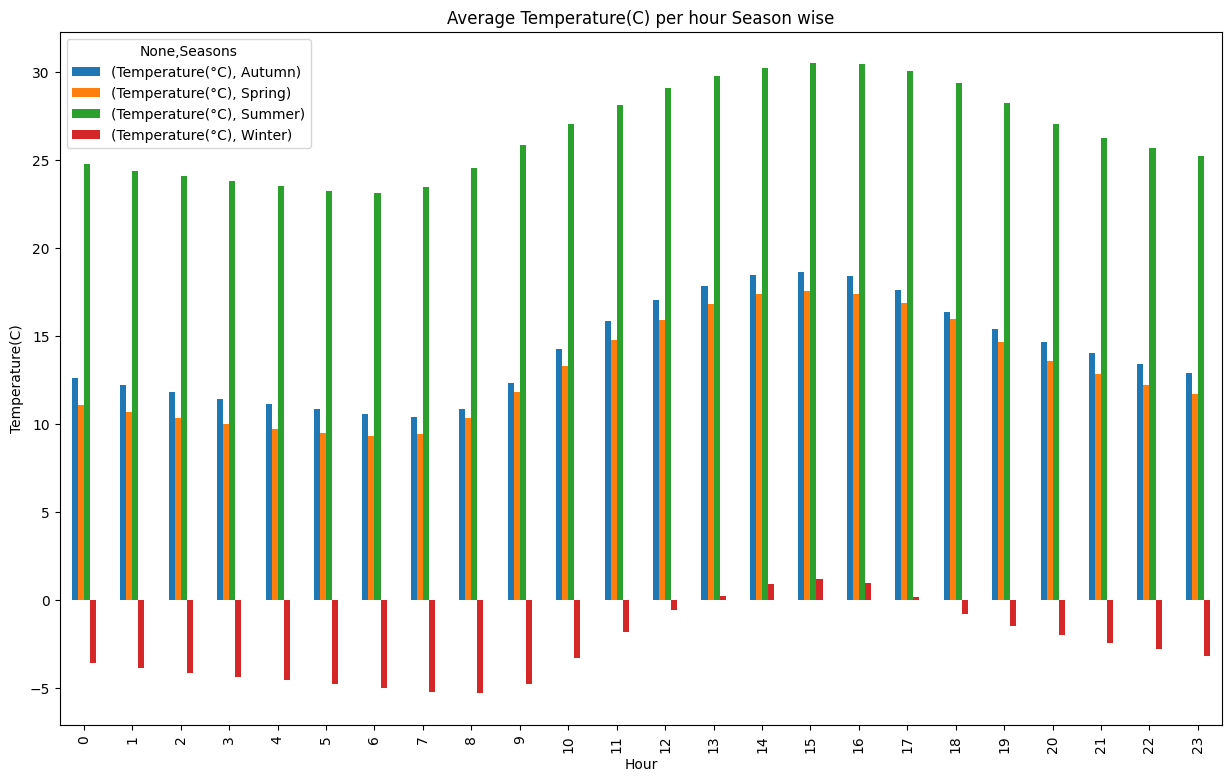

In [249]:
# average temperature per hour season wise
avg_temp_season.plot(kind='bar',
                     figsize=(15,9),
                     title='Average Temperature(C) per hour Season wise',
                     ylabel='Temperature(C)')

##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of app uploads in different categories.

##### 2. What is/are the insight(s) found from the chart?

We see that during the summer season we have highest demand. This is followed by Autumn and Spring season. The least demand expressed by the users was in the Winter season

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights presented above indicates that people like to use the rental bike service when it gets warmer outside. So the rental bike service should should make sure a stable supply of demand during the warmer times of the day.

#### Chart - 2 Rented Bike Count vs Humidity (Univariate)

<Axes: title={'center': 'Rented Bike Count vs Humidity(%)'}, xlabel='Humidity(%)'>

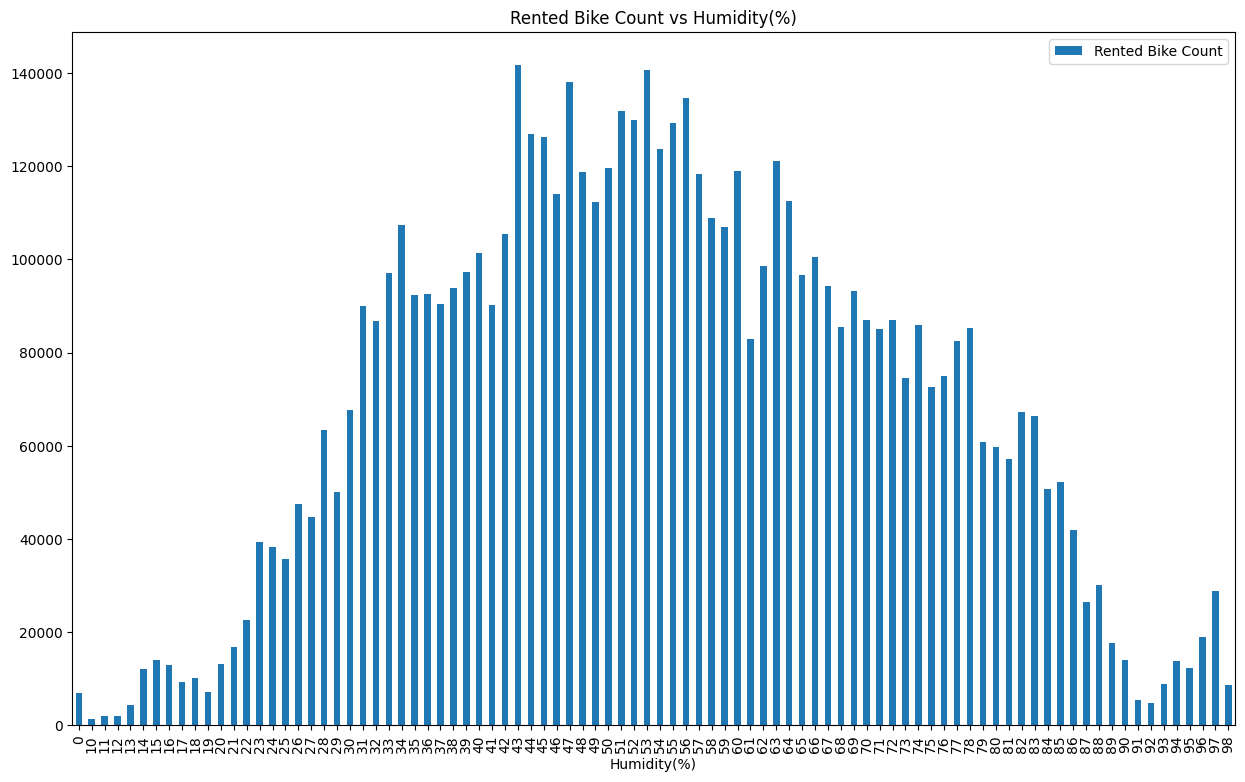

In [250]:
# Chart - 2 finding the sum of all the rented bikes based on humidity(%)

mod_df.groupby('Humidity(%)').agg({'Rented Bike Count':'sum'}).plot(kind='bar',
                                                                    figsize=(15,9),
                                                                    title='Rented Bike Count vs Humidity(%)')


##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of app uploads in different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that the most number of bikes rented was when the Humidity was between the range of 40 to 60.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if the humditiy on a particular day is in the range of 40 to 60, the is a very high chance of increased bike demand.

#### Chart - 3 Rainfall(mm) vs Rented Bike Count (Univariate)

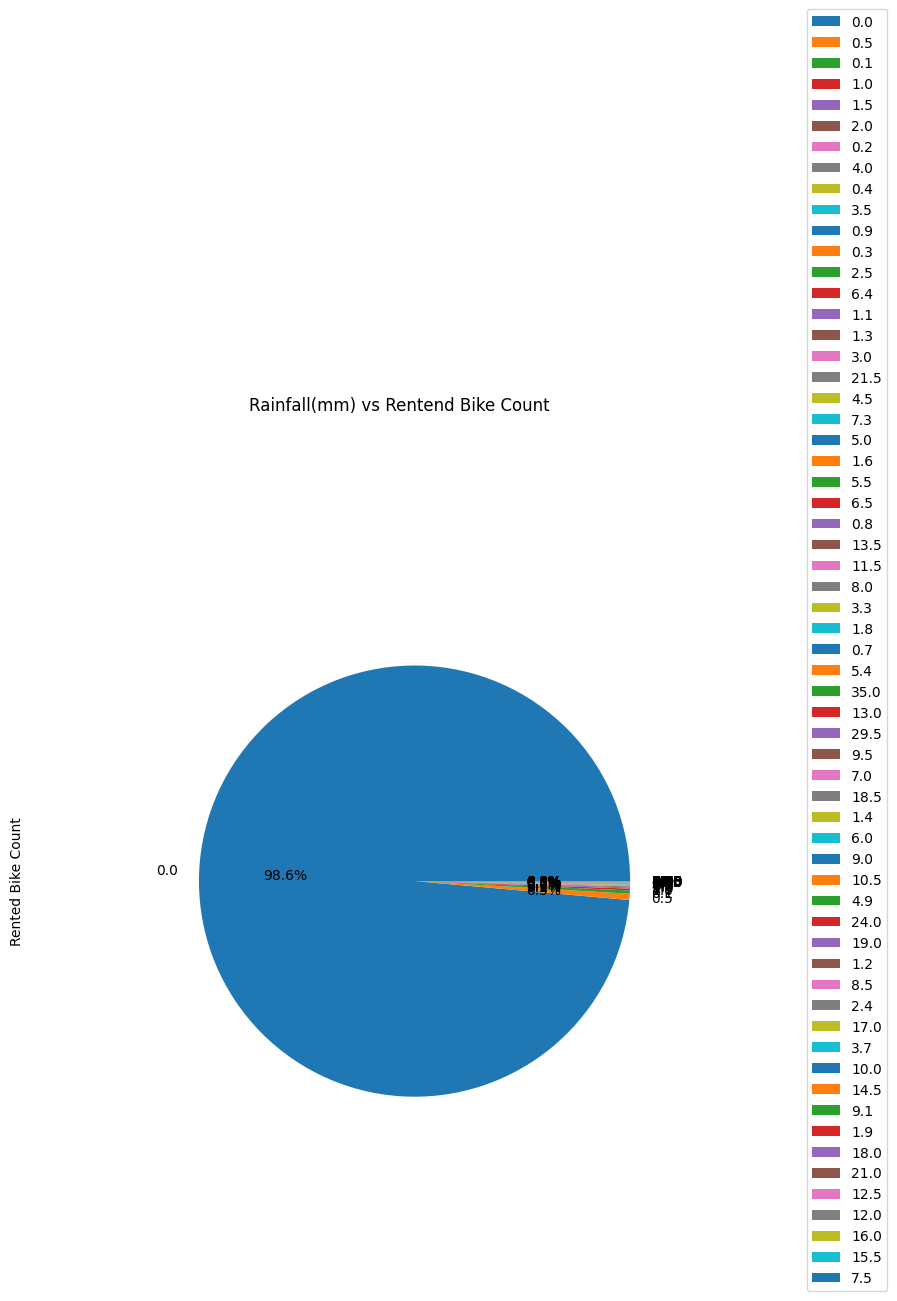

In [251]:
# Chart - 3 Finding the rented bikes sum for different rainfall categories

mod_df.groupby('Rainfall(mm)').agg({'Rented Bike Count':'sum'}).sort_values(by='Rented Bike Count',ascending=False).plot(kind='pie',
                                                                                                                        subplots=True,
                                                                                                                        figsize=(12,10),
                                                                                                                         radius=0.7,
                                                                                                                        autopct='%1.1f%%',
                                                                                                                        title='Rainfall(mm) vs Rentend Bike Count')
plt.legend(loc='center left',bbox_to_anchor = (1.0,0.8))

##### 1. Why did you pick the specific chart?

A pie chart is used to show part-in-total values of the dataset. Here we use this chart to show the total number of bike counts in every individual Humidities.

##### 2. What is/are the insight(s) found from the chart?

As we can see from the above pie chart that majority(98.6%) of bikes were rented when the humditiy was 0.0. This mean that users prefer renting bikes when humidity is almost zero. But this data could also mean that humidity in Seoul is almost always zero and that change in humidity doesn't affect the demand of bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above analysis could be an indication that people of Seoul prefer renting bikes when humidity is 0.0 or it could be just that majority of the time the humidity of Seoul City remains 0.0 and that any change does not effect the demand of rental Bike service.

#### Chart - 4 Wind Speed (m/s) vs Total Rented Bikes Count (Univariate)

<Axes: title={'center': 'Rented Bike Count vs Wind speed (m/s)'}, xlabel='Wind speed (m/s)', ylabel='Total Rented Bikes'>

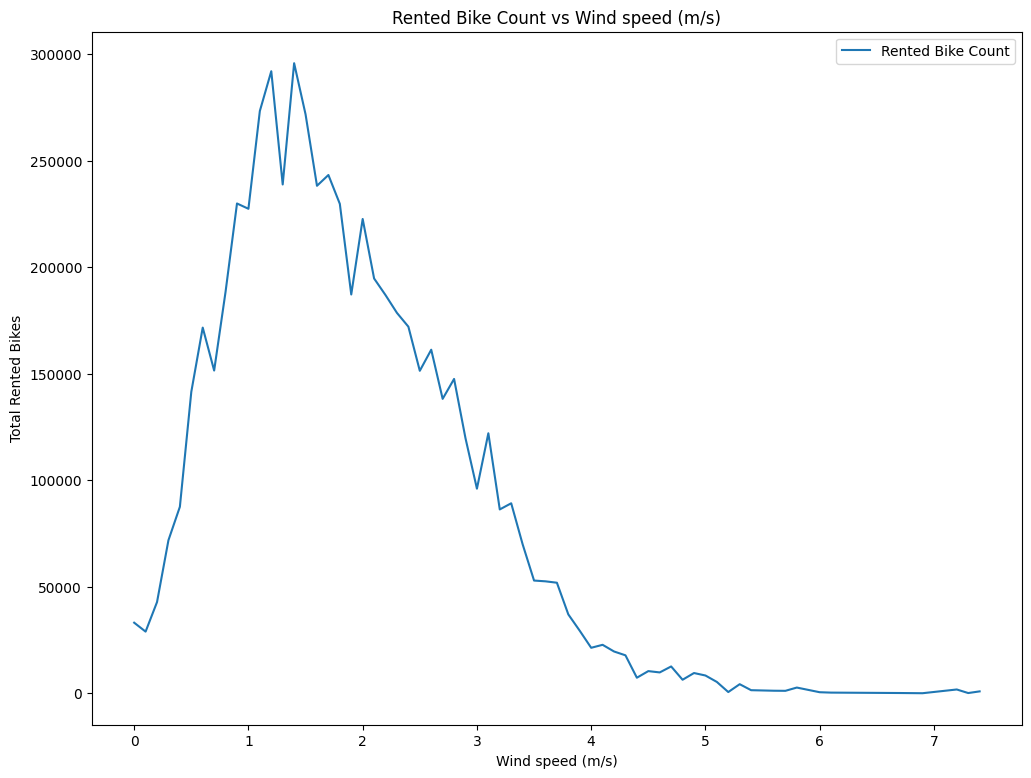

In [252]:
# Chart - 4 finding the total number of bikes rented with respect to wind speed
mod_df.groupby('Wind speed (m/s)').agg({'Rented Bike Count':'sum'}).sort_values(by='Wind speed (m/s)').plot(figsize=(12,9),
                                                                                                            ylabel='Total Rented Bikes',
                                                                                                            title='Rented Bike Count vs Wind speed (m/s)')


##### 1. Why did you pick the specific chart?

Line chart is traditionally used to show relation between two variables in a dataset. Hence a line chart was used to the variation of Total Rented Bike Count based on Wind Speed (m/s).

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see that most number of bikes that was rented was in the wind speed range of 1 to 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above analysis, we can say that the average wind speed of Seoul city is between 1 to 1.5, and people usually prefer to rent bikes in these weather conditions. One reason could be that it could help the rider to stay cool while riding the bike.

#### Chart - 5

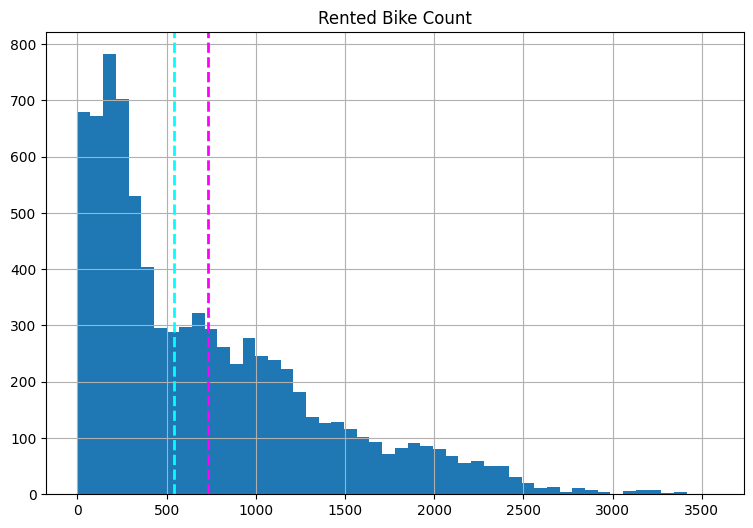

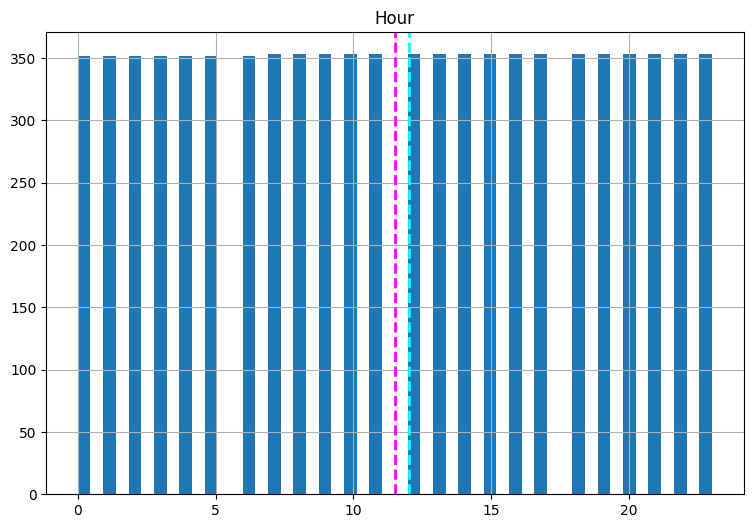

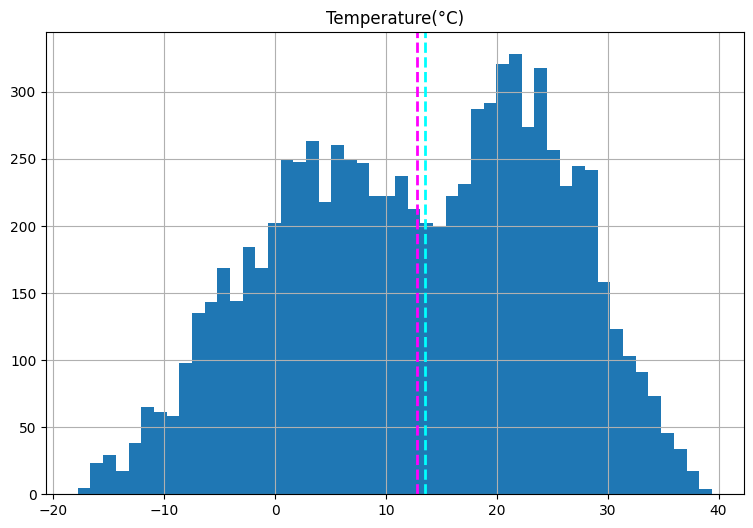

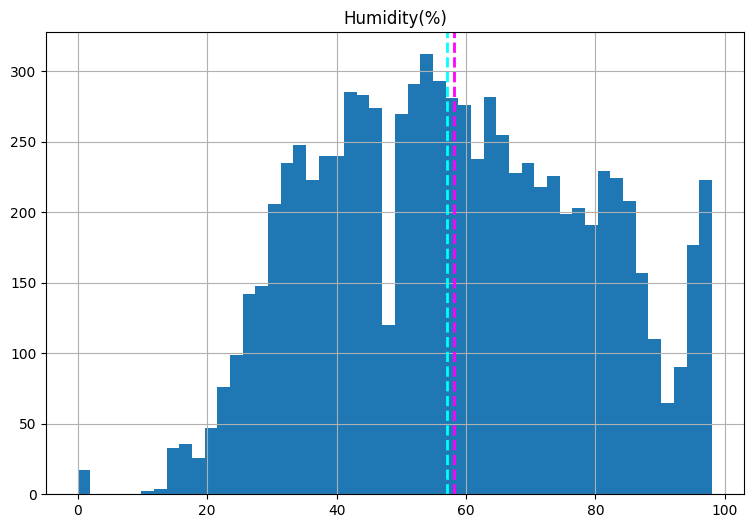

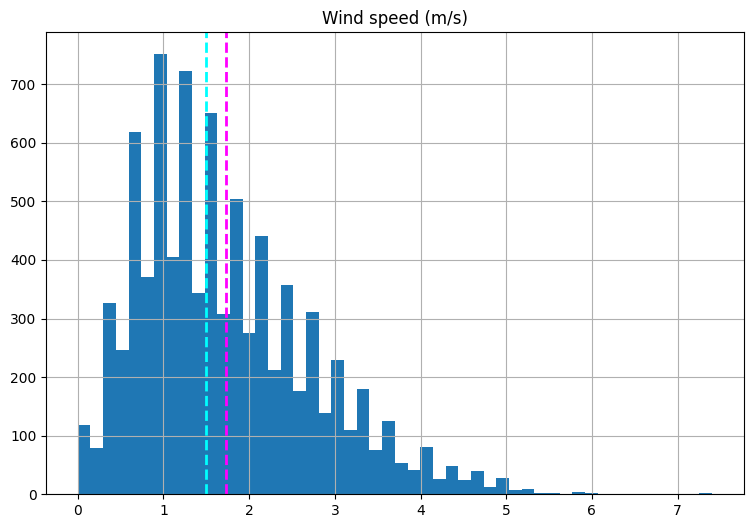

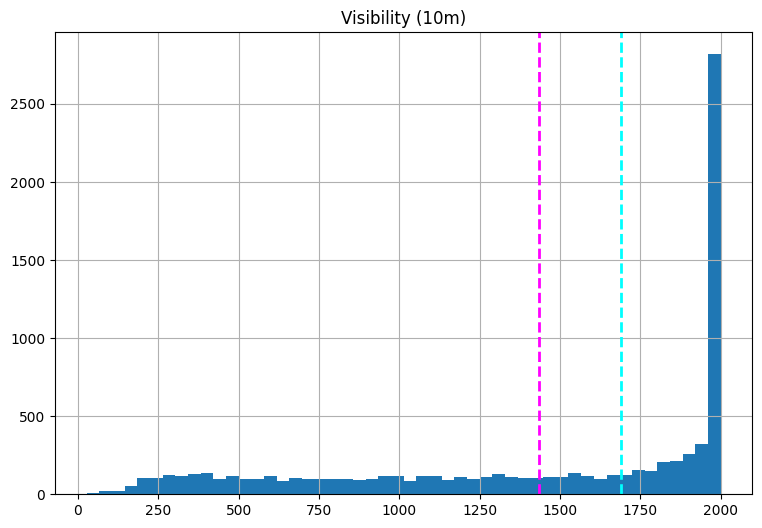

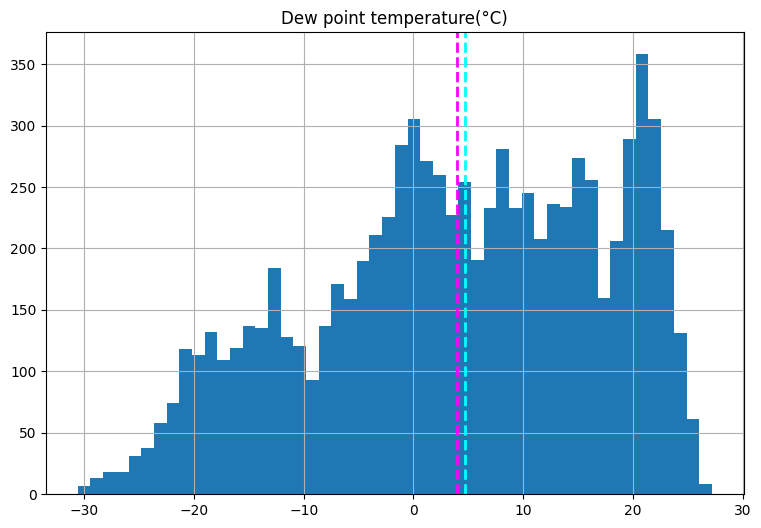

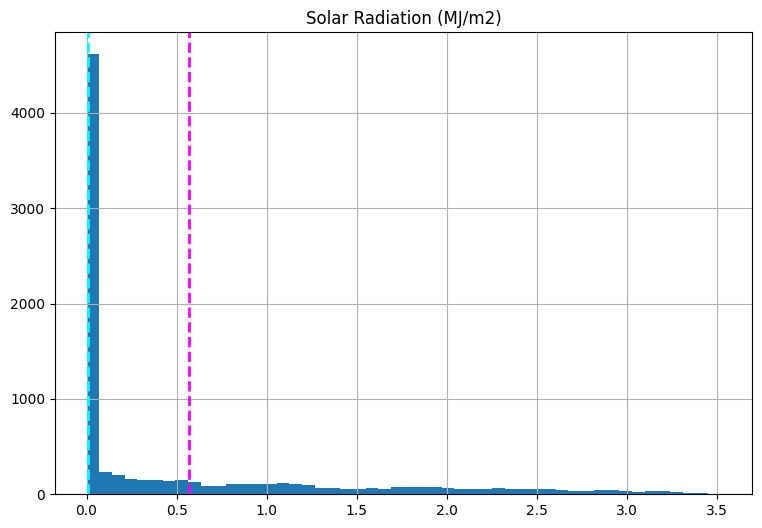

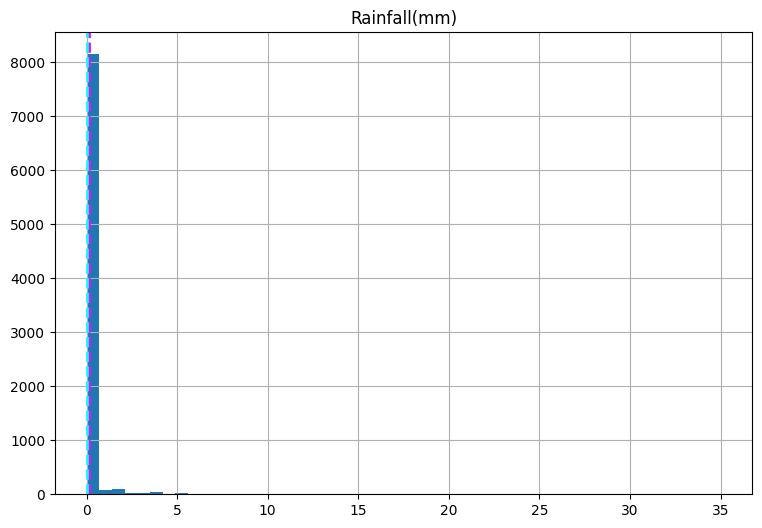

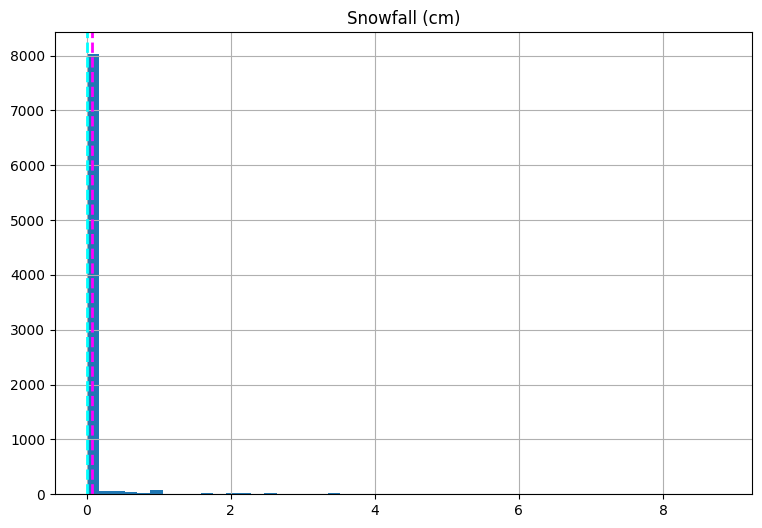

In [253]:
# Chart - 5
num_features = mod_df.select_dtypes(exclude=['object']).columns

for col in num_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = mod_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

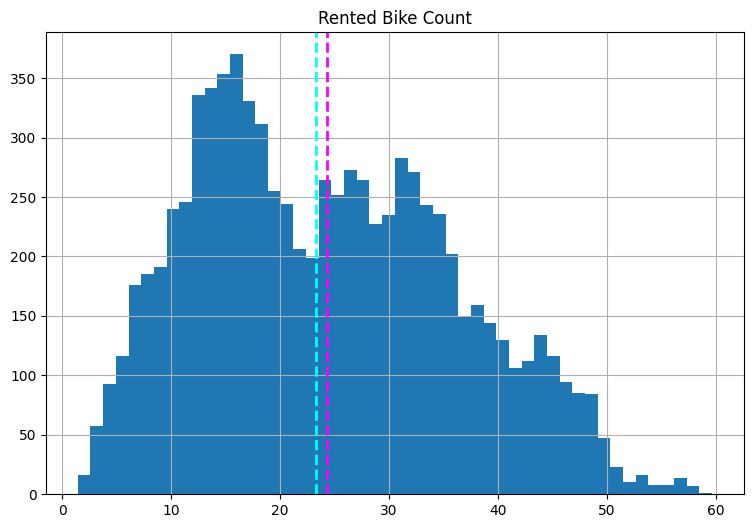

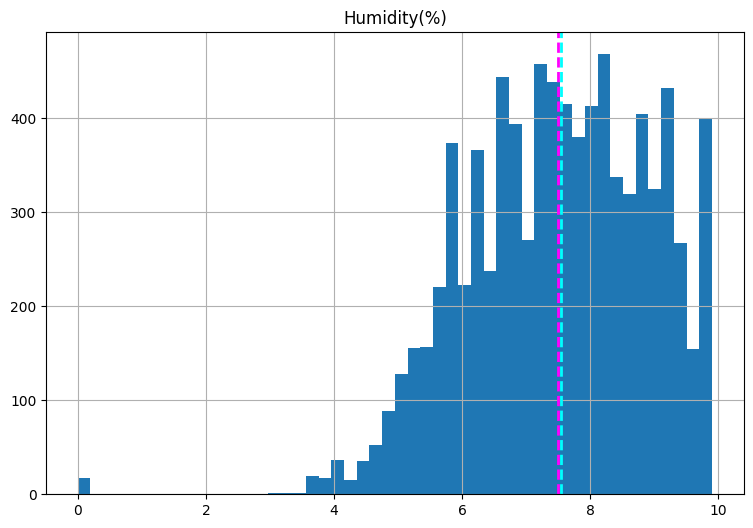

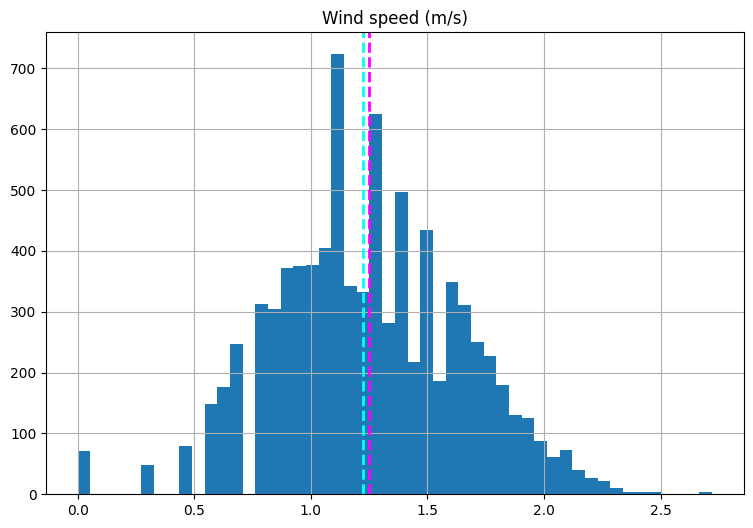

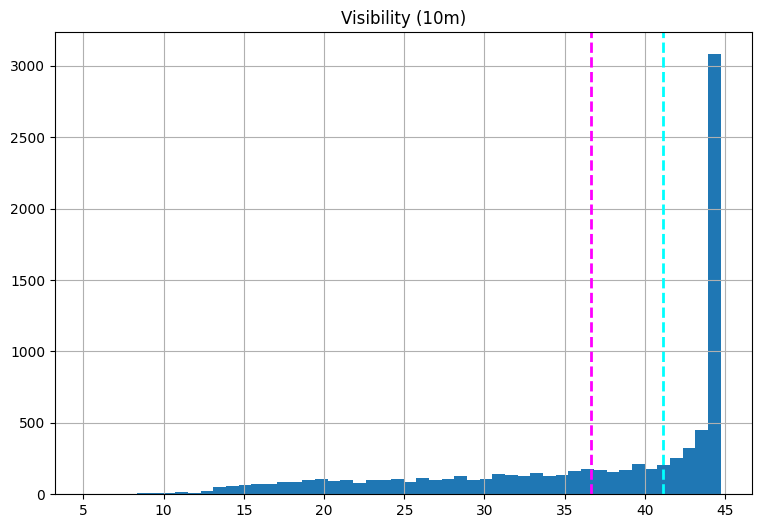

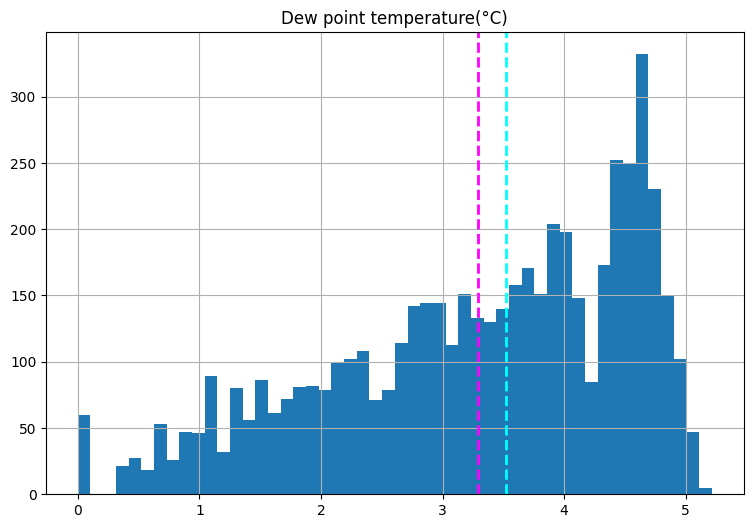

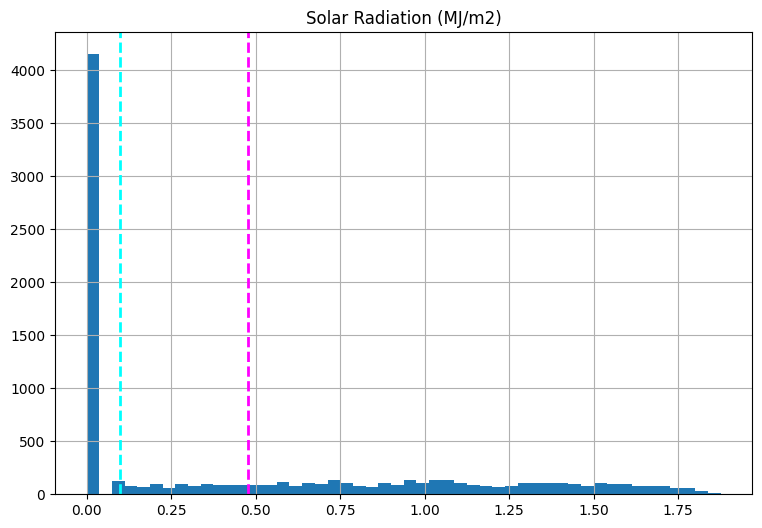

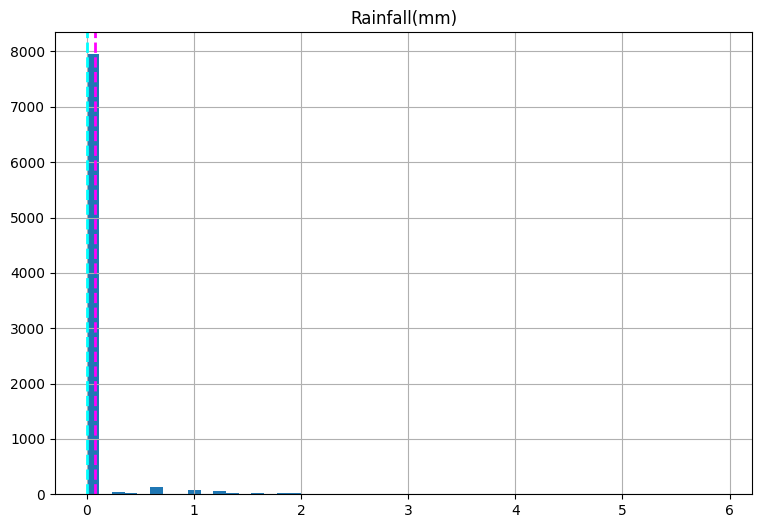

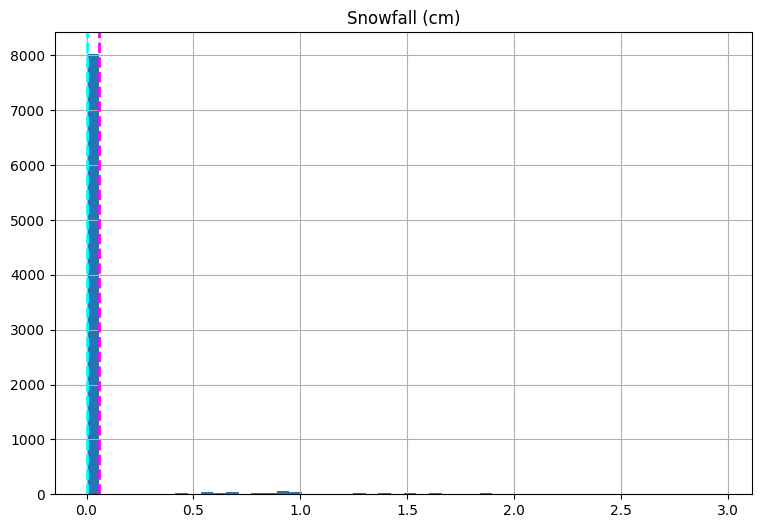

In [254]:
# Applying Square root Transformation
for col in num_features[1:]:
  if col not in ['Hour','Temperature(°C)']:
    try:
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      feature = np.sqrt(mod_df[col])
      feature.hist(bins=50, ax = ax)
      ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
      ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
      ax.set_title(col)
    except:
      print('An error occured')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6 Relation between Rented Bike Count vs Other Features (Bi-variate Analysis)

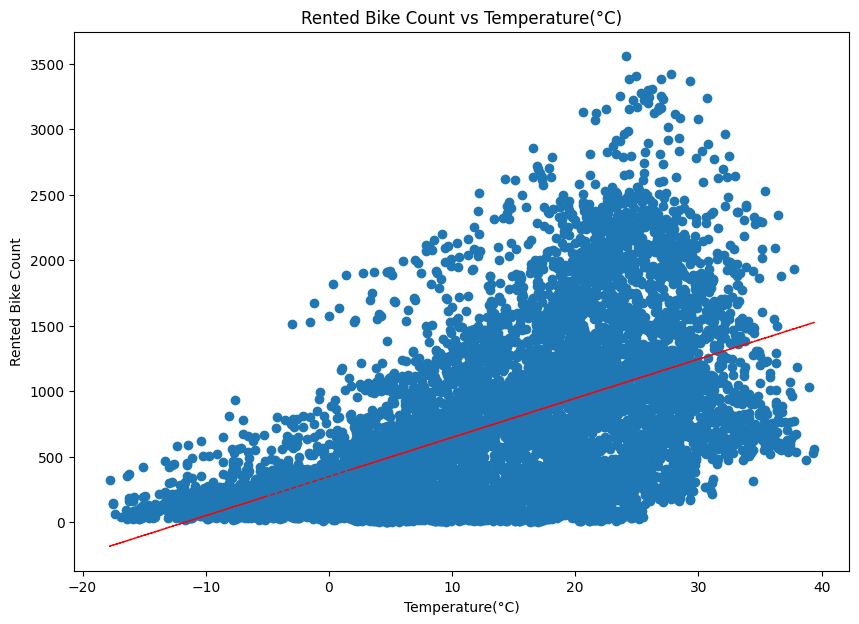

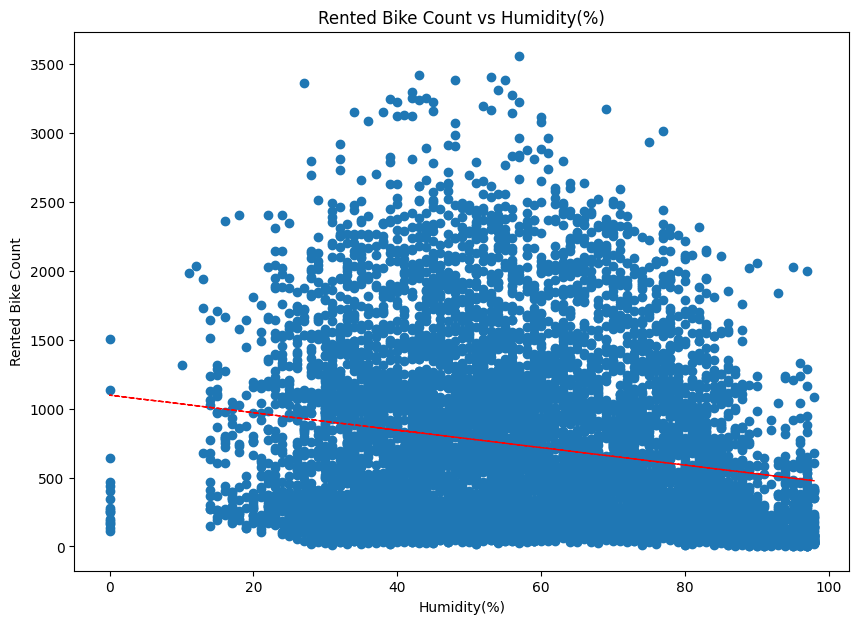

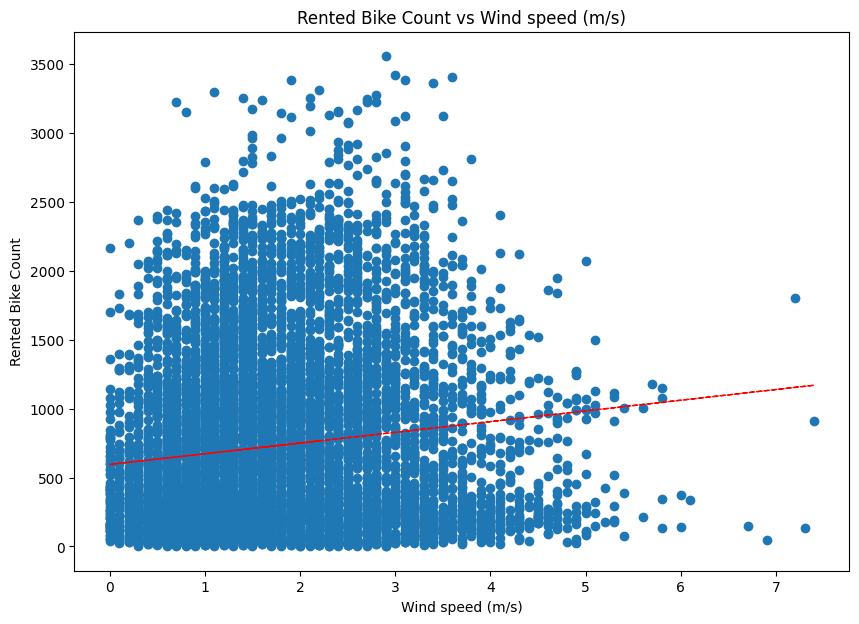

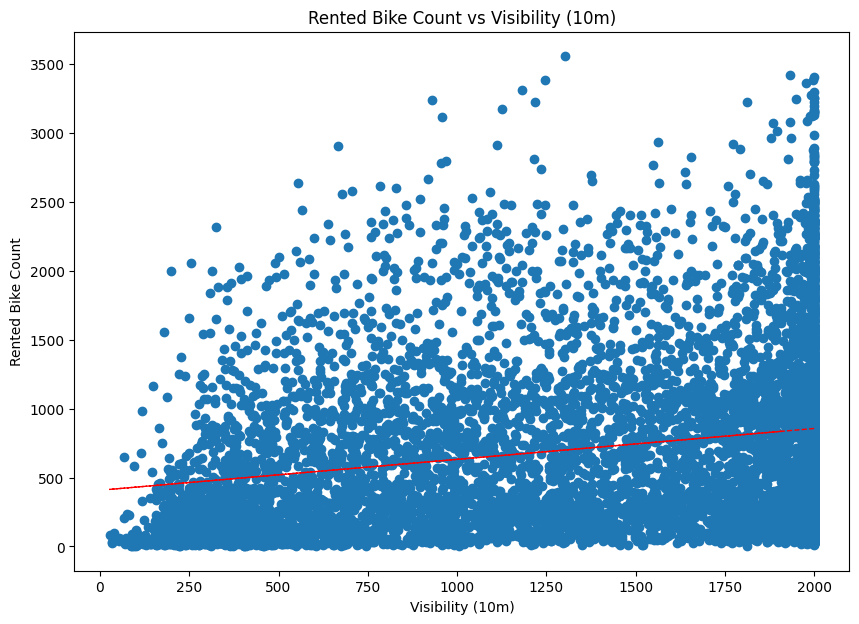

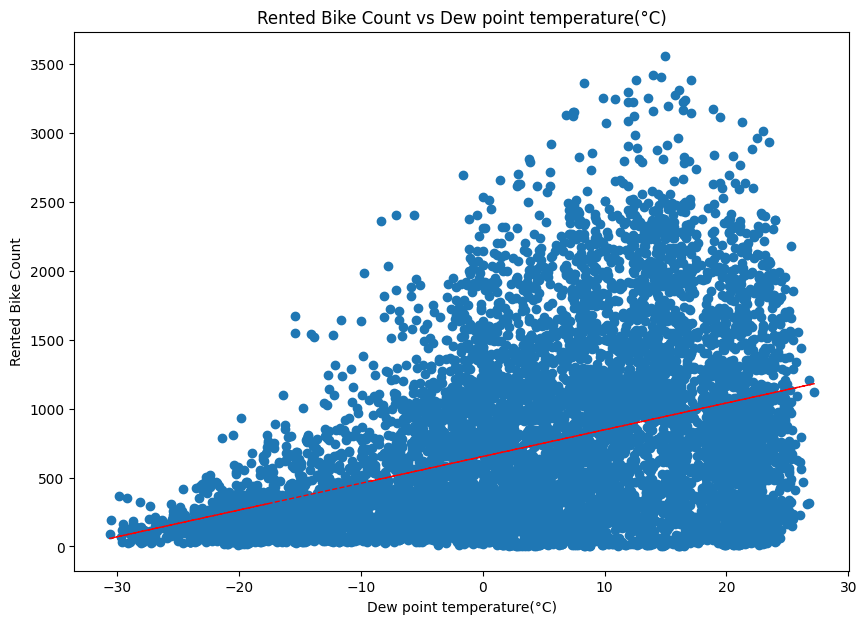

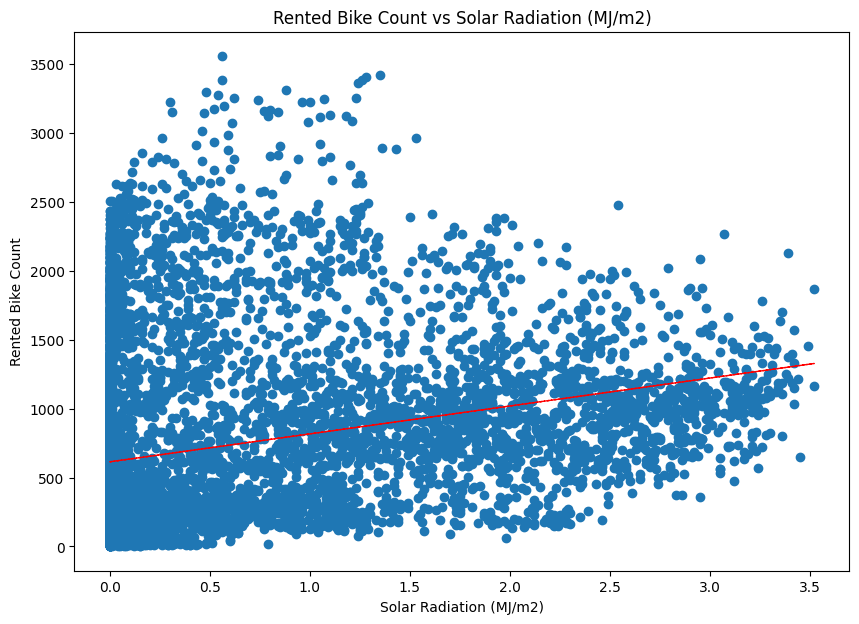

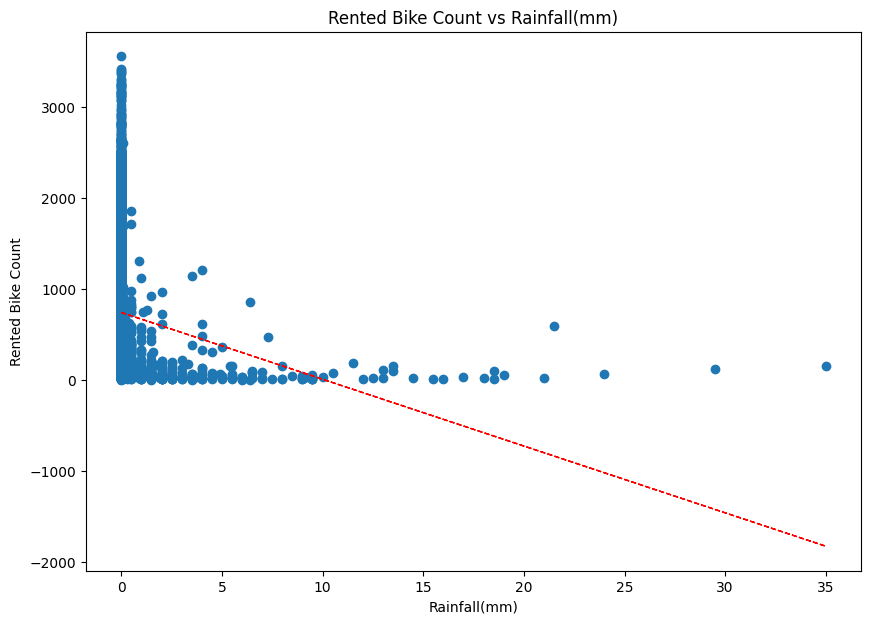

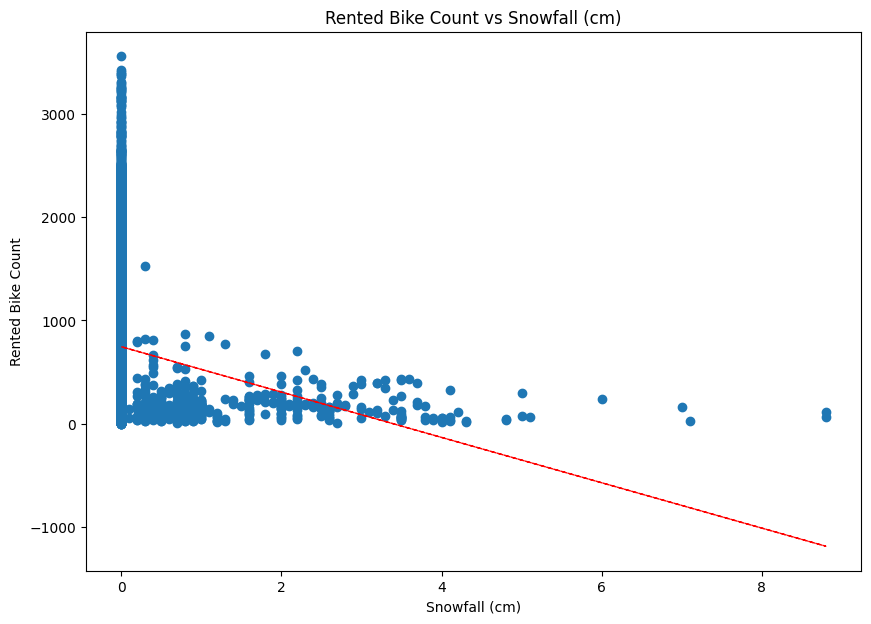

In [255]:
# Chart - 6
# Creating list of numeric columns
d = list(mod_df.describe().columns)
d.remove('Rented Bike Count')

# Finding correlation between Rented Bike Count and other features
for col in d[1:]:
  fig = plt.figure(figsize=(10,7))
  axis = fig.gca()
  feature = mod_df[col]
  bike_count = mod_df['Rented Bike Count']
  plt.scatter(x=feature, y=bike_count)
  axis.set_title('Rented Bike Count vs ' + col)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')

  z = np.polyfit(feature, bike_count,1)
  y_pred=np.poly1d(z)(mod_df[col])
  plt.plot(feature,y_pred,'r--',lw=1)

##### 1. Why did you pick the specific chart?

Scattered plots helps in visualizing clusters of data points between two or more variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, we see that the is a strong relationship between rented bike count and temperature of atmosphere and between rented bike count and dew point temperture.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because of the strong relations between those two variables and rented bike count, this can help us predict the rented bike sharing demand. Also in hypothesis testing we see that weather the difference between temperature and dew point temperature makes any changes in bike demand.

#### Chart - 7 Bike demand analysis w.r.t. Seasons, Hour, Holiday, Functioning Day (Bivariate Analysis)

Text(0.5, 1.0, 'Rented Bike Count vs Seasons')

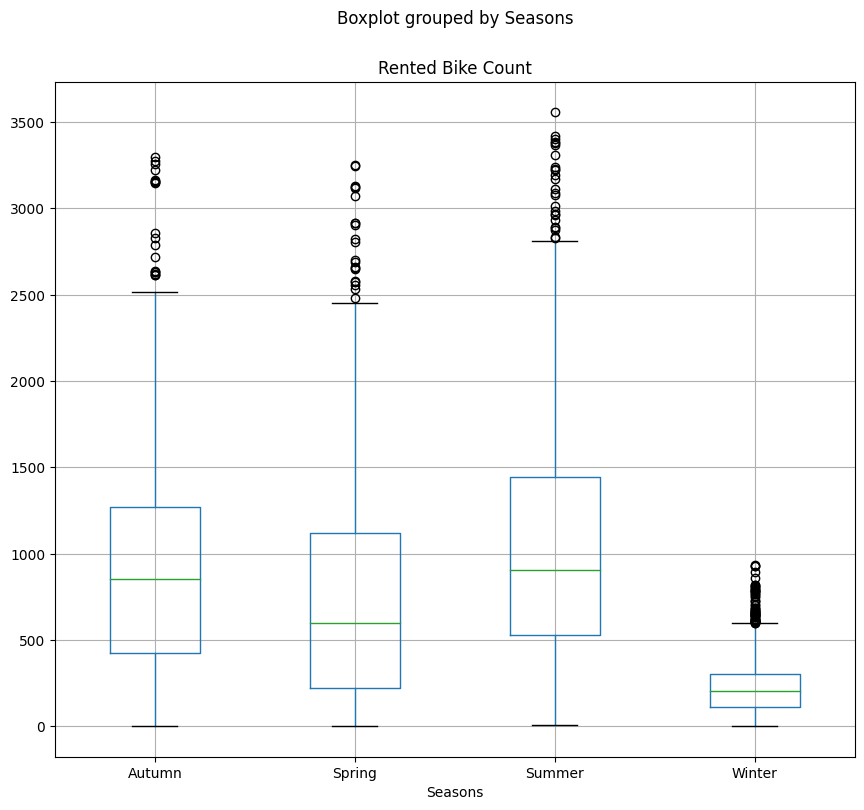

In [256]:
# Chart - 7 Box plot for Seasons vs Rented Bike Count
fig = plt.figure(figsize=(10,9))
axis = plt.gca()
mod_df.boxplot(column = 'Rented Bike Count', by = 'Seasons', ax = axis)
ax.set_ylabel('Seasons')
ax.set_title('Rented Bike Count vs Seasons')

Text(0.5, 1.0, 'Rented Bike Count vs Seasons')

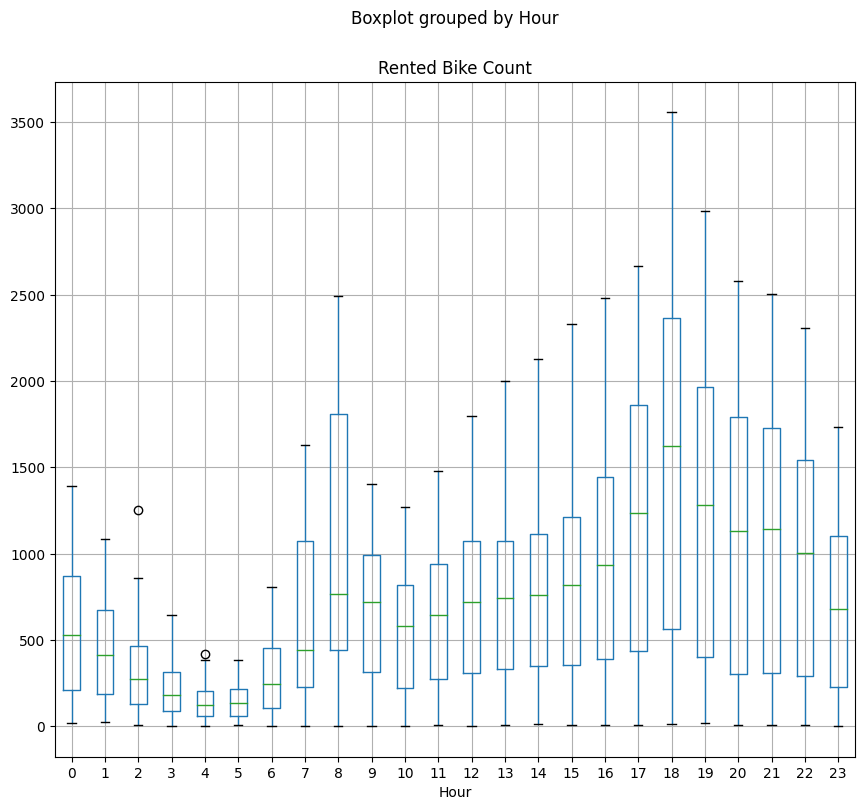

In [257]:
# Box plots for Hour vs Rented Bike Count
fig = plt.figure(figsize=(10,9))
axis = plt.gca()
mod_df.boxplot(column = 'Rented Bike Count', by = 'Hour', ax = axis)
ax.set_xlabel('Rented Biked Count')
ax.set_ylabel('Hour')
ax.set_title('Rented Bike Count vs Seasons')

Text(0.5, 1.0, 'Rented Bike Count vs Seasons')

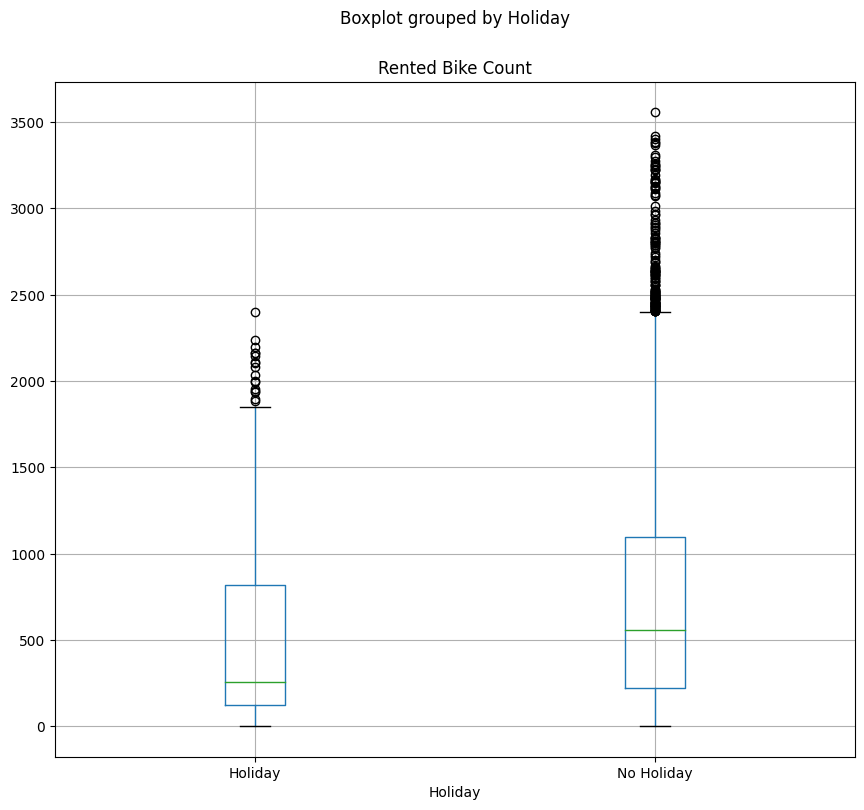

In [258]:
# Box plots for Holiday vs Rented Bike Count
fig = plt.figure(figsize=(10,9))
axis = plt.gca()
mod_df.boxplot(column = 'Rented Bike Count', by = 'Holiday', ax = axis)
ax.set_xlabel('Rented Biked Count')
ax.set_ylabel('Holiday')
ax.set_title('Rented Bike Count vs Seasons')

Text(0.5, 1.0, 'Rented Bike Count vs Seasons')

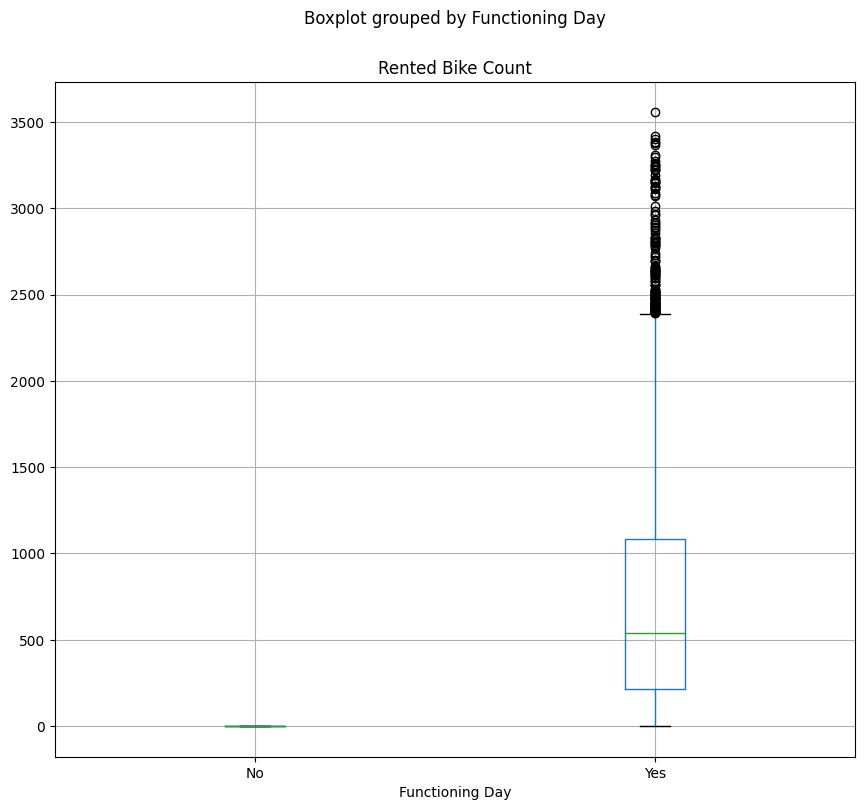

In [259]:
# Box plots for Functioning Day vs Rented Bike Count
fig = plt.figure(figsize=(10,9))
axis = plt.gca()
df.boxplot(column = 'Rented Bike Count', by = 'Functioning Day', ax = axis)
ax.set_xlabel('Rented Biked Count')
ax.set_ylabel('Functioning Day')
ax.set_title('Rented Bike Count vs Seasons')

##### 1. Why did you pick the specific chart?

Box plots are used to show quarterly analysis of datasets. It show in what proportion (25%, 50%, 75%) the data is spread. It sometimes helps us find outliers as well.

Therefore this plot was used to analyse the quartile range of Hour, Seasons, Holiday and Functioning day.

##### 2. What is/are the insight(s) found from the chart?

For the above analysis, we see that autumn, summer and spring seasons have almost the same spread of demand wereas there is very less spread in winter season.

Also we see that the spread of the 18th hour of the day is the highest followed by 8th hour of the day.

And Holiday the spread of the data is less as compared to non-Holiday.
There was no bike rented on non-functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we can see that difference in bike demand between holiday and non-holiday is not very high which indicates that people like to rent bikes even on holidays.

Also, higher demand on non holidays mean people use rented bike to cummute to workplaces also.

#### Chart - 8 - Correlation Heatmap

<Axes: >

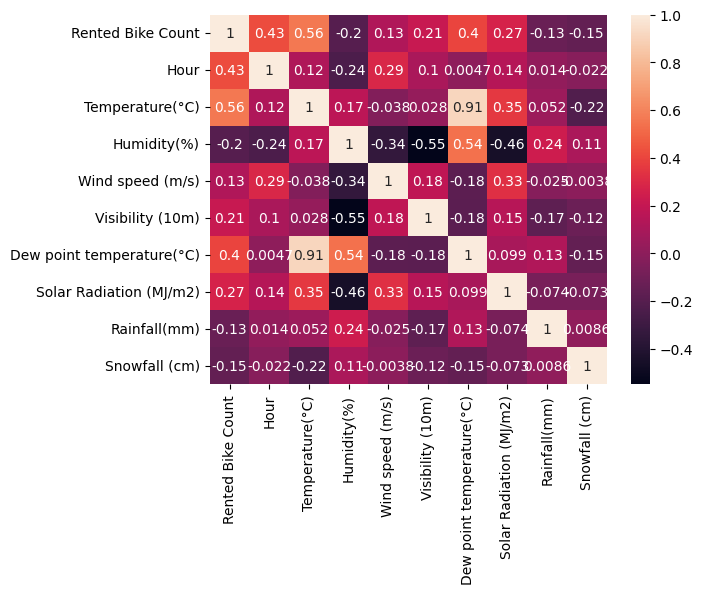

In [260]:
# Correlation Heatmap between each feature
corre = mod_df.corr()
sns.heatmap(data=corre, annot=True)

In [261]:
# Top features that which have correlation of 30% or higer w.r.t. Rented Bike Count
correlation = 0.3

corre = [col for col in d if abs(mod_df[col].corr(mod_df['Rented Bike Count'])) >= correlation]
numbers = [mod_df[col].corr(mod_df['Rented Bike Count']) for col in d if abs(mod_df[col].corr(mod_df['Rented Bike Count'])) >= correlation]
result = pd.DataFrame({'Columns': corre,'Correlation': numbers})
result

,Columns,Correlation
0,Hour,0.425256
1,Temperature(°C),0.562740
2,Dew point temperature(°C),0.400263


##### 1. Why did you pick the specific chart?

Correlation heatmap are generally used to visualize corelation/dependency of one variable with the other.

Therefore a correlation heatmap was used to visualize corrrelation between variables such as hour, temperature, humidity, windspeed, solar radiation, dew point temperature, rented bike count, visibility, rainfall and snowfall.

##### 2. What is/are the insight(s) found from the chart?

We see that there is very high correlation between temperature and dew point temperature. This could lead to Multicolinearity and may also have high variance inflation factor.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [262]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values.

### 2. Handling Outliers

In [263]:
# Handling Outliers & Outlier treatments
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##### What all outlier treatment techniques have you used and why did you use those techniques?

There outliers are not significant and should be considered in the model for the following reasons: -

* **Rented Bike Count** (Min value: 0, Max value: 3556)
* **Temperature(°C)** (Min value: -17.8,Max value: 39.4)
* **Humidity(%)** (Min value: 0 ,Max value: 98)
* **Wind speed(m/s)** (Min value: 0,Max value: 7.4 m/s)
* **Visibility(10m)** (Min value: 27,Max value: 2000)
* **Dew point temperature(°C)** (Min value: -30,Max value: 27)
* **Solar Radiation (MJ/m2)** (Min value: 0,Max value: 3.52)
* **Rainfall(mm)** (Min value: 0, Max value: 35)
* **Snowfall(cm)** (Min value: 0, Max value: 8.8)

All these values can occur naturally and are well within the range. Hence no values will be removed.

### 3. Categorical Encoding

In [295]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
copy_df = df.copy()
# Transforming Columns using Label encoder and storing individual column encoder values in dictionary
d = defaultdict(LabelEncoder)
encoded_df = copy_df.loc[:,['Seasons','Holiday']].apply(lambda x: d[x.name].fit_transform(x))
encoded_df

,Seasons,Holiday
0,3,1
1,3,1
2,3,1
3,3,1
4,3,1
...,...,...
8755,0,1
8756,0,1
8757,0,1
8758,0,1


In [297]:
# Assiging encoded values to copied columns
for col in encoded_df:
  copy_df[col] = encoded_df[col]

In [298]:
copy_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,Yes


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [265]:
# Expand Contraction

#### 2. Lower Casing

In [266]:
# Lower Casing

#### 3. Removing Punctuations

In [267]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [268]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [269]:
# Remove Stopwords

In [270]:
# Remove White spaces

#### 6. Rephrase Text

In [271]:
# Rephrase Text

#### 7. Tokenization

In [272]:
# Tokenization

#### 8. Text Normalization

In [273]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [274]:
# POS Taging

#### 10. Text Vectorization

In [275]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [276]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [277]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [278]:
# Transform Your data

### 6. Data Scaling

In [279]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [280]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [281]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [282]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [283]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [284]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [285]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [286]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [287]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [288]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [289]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [290]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [291]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [292]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***